Auteurs: 

        - Bogo Serge
        
        - Jese Rasolondraibe
        
        - Mohamed Cisse
        
        - Opporttun juray Kouka

# Plan:

- Importer les librairies
- Charger les jeux de données
- Faire l'analyse exploratoire de données
- Modélisation et prédiction

# Librairies

In [2]:
# Pandas pour manipuler les Dataframe
import pandas as pd
# Seaborn pour la visualisation des données
import seaborn as sn
# Matplotlib pour la visualisation
from matplotlib import pyplot as plt
# Numpy pour les matrix, tableaux, etc
import numpy as np
# train_test_split pour diviser le dataset en deux parties: une pour l'entrainement et l'autre pour le test
from sklearn.model_selection import train_test_split
# ColumnTransformer pour transformer des colonnes
from sklearn.compose import ColumnTransformer
# Pipeline pour créer des pipelines
from sklearn.pipeline import Pipeline
# OneHotEncoder pour encoder les variables categorielles et MinMaxScaler pour standardiser les valeurs
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelBinarizer
# SimpleImputer pour imputer des valeurs manquantes
from sklearn.impute import SimpleImputer
# Modèles utilisés
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
# Gridsearch pour l'optimization des hyperparamètres
from sklearn.model_selection import GridSearchCV
# os pour le système d'exploitation
import os
# métriques pour l'évaluation des modèles
from sklearn.metrics import  accuracy_score, roc_curve, mean_squared_error
from sklearn import metrics

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'df_maths',
 'KNN.ipynb',
 'LRegression.ipynb',
 'Notebook (1).ipynb',
 'RandomForest.ipynb',
 'student-mat (1).csv',
 'student-por.csv',
 'transformers.py',
 'Untitled.ipynb',
 'Untitled3.py',
 '__pycache__']

###### Question 1 : Loading the data set

In [4]:
# Loading the datasets.
pd.set_option('display.max_columns', None)
df_maths = pd.read_csv('student-mat (1).csv', sep = ';')
df_por = pd.read_csv('student-por.csv', sep = ';')

In [5]:
df_maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [7]:
print('Il y a {} observations et {} variables pour le jeu de donnée df_maths.'.format(df_maths.shape[0],df_maths.shape[1]))
print('Il y a {} observations et {} variables pour le jeu de données df_por.'.format(df_por.shape[0],df_por.shape[1]))

Il y a 395 observations et 33 variables pour le jeu de donnée df_maths.
Il y a 649 observations et 33 variables pour le jeu de données df_por.


In [8]:
# Le type de chaque variable
df_maths.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
df_por.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

###### Adding a categorical variable called finalResult (Question 2 )

In [9]:
df_maths['finalResult'] = np.where(df_maths['G3'] >=10, 'pass', 'fail')
df_por['finalResult'] = np.where(df_por['G3'] >=10, 'pass', 'fail')

In [11]:
df_maths.finalResult.head()

0    fail
1    fail
2    pass
3    pass
4    pass
Name: finalResult, dtype: object

In [12]:
df_por.finalResult.head()

0    pass
1    pass
2    pass
3    pass
4    pass
Name: finalResult, dtype: object

###### Adding a categorical variable called academicGrade(Question 3 )

In [13]:
def func_grade(x):
    """
    Cette fonction prend en entrée la note x et 
    retourne le grade associé à x.
    """
    if x >= 16 and x <= 20:
        return 'A'
    elif x <= 15 and  x>=14:
        return 'B'
    elif x <= 13 and x>= 12:
        return 'C'
    elif x <= 11 and x >=10:
        return 'D'
    else:
        return 'E'

In [14]:
df_maths['academicGrade'] = df_maths['G3'].apply(func_grade) 
df_por['academicGrade'] = df_por['G3'].apply(func_grade) 

In [15]:
df_maths.academicGrade.head()

0    E
1    E
2    D
3    B
4    D
Name: academicGrade, dtype: object

In [16]:
df_por.academicGrade.head()

0    D
1    D
2    C
3    B
4    C
Name: academicGrade, dtype: object

# Analyse exploratoire de données ( question 4) 

##### Valeurs manquantes

In [17]:
# Les valeurs manquantes
df_maths.isnull().sum()

school           0
sex              0
age              0
address          0
famsize          0
Pstatus          0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
absences         0
G1               0
G2               0
G3               0
finalResult      0
academicGrade    0
dtype: int64

In [17]:
df_por.isnull().sum()

school           0
sex              0
age              0
address          0
famsize          0
Pstatus          0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
guardian         0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
Dalc             0
Walc             0
health           0
absences         0
G1               0
G2               0
G3               0
finalResult      0
academicGrade    0
dtype: int64

- Il n'y a pas de valeurs manquantes dans le jeu de données.

#####  Visualisation de données: df_maths et df_por

##### school

<AxesSubplot:>

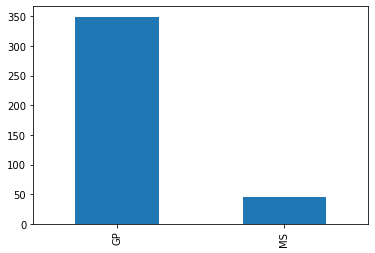

In [18]:
df_maths.school.value_counts().plot.bar()

<AxesSubplot:>

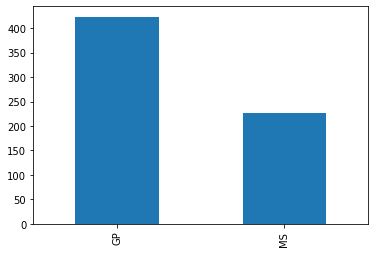

In [19]:
df_por.school.value_counts().plot.bar()

- Commentaire: Il y a plus des étudiants de l'établissemen Gabriel Pereira .

##### sex

<AxesSubplot:>

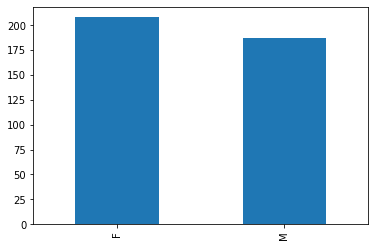

In [20]:
df_maths.sex.value_counts().plot.bar()

<AxesSubplot:>

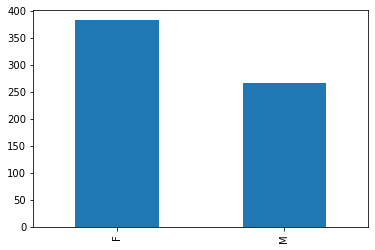

In [21]:
df_por.sex.value_counts().plot.bar()

- Le nombre de filles est supérieure à celui des garçons.

##### age

<AxesSubplot:>

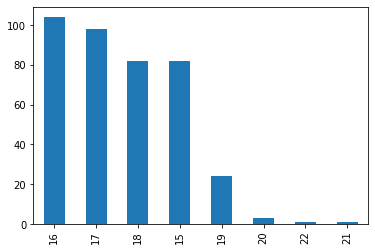

In [22]:
df_maths.age.value_counts().plot.bar()

<AxesSubplot:>

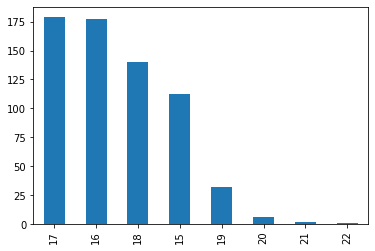

In [23]:
df_por.age.value_counts().plot.bar()

- La plupart des élèves ont entre 15 et 18 ans.

##### Address

<AxesSubplot:>

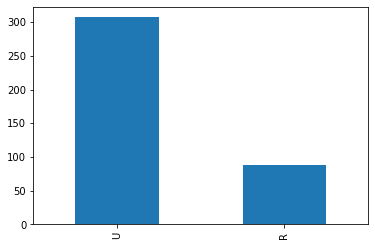

In [24]:
df_maths.address.value_counts().plot.bar()

<AxesSubplot:>

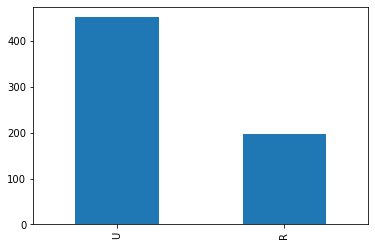

In [25]:
df_por.address.value_counts().plot.bar()

- La plupart d'élèves vit à l'adresse U.

##### famsize

<AxesSubplot:>

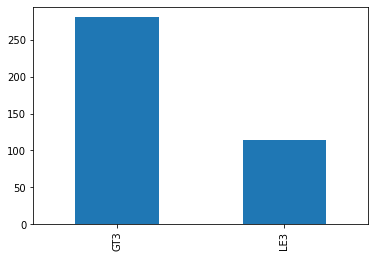

In [26]:
df_maths.famsize.value_counts().plot.bar()

<AxesSubplot:>

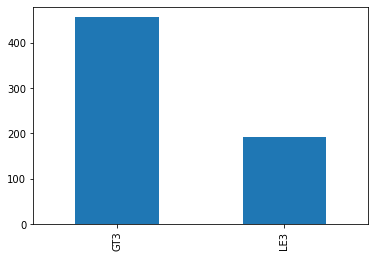

In [27]:
df_por.famsize.value_counts().plot.bar()

- La plupart des élèves viennent d'une famille ayant plus de 3 enfants.

##### Pstatus

<AxesSubplot:>

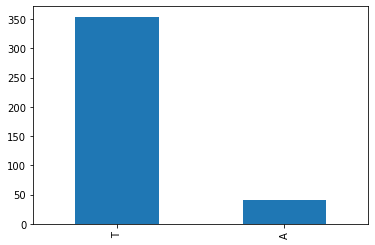

In [29]:
df_maths.Pstatus.value_counts().plot.bar()

<AxesSubplot:>

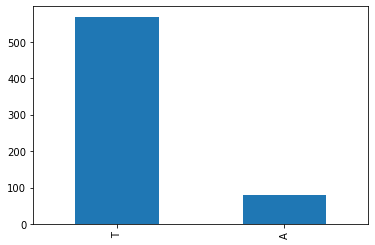

In [30]:
df_por.Pstatus.value_counts().plot.bar()

- Beaucoup d'élèves ont des parents vivant ensemble.

##### Medu

<AxesSubplot:>

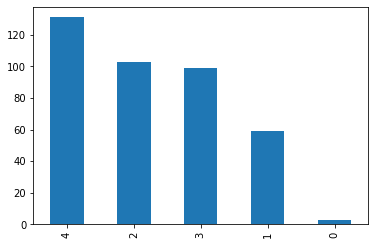

In [31]:
df_maths.Medu.value_counts().plot.bar()

<AxesSubplot:>

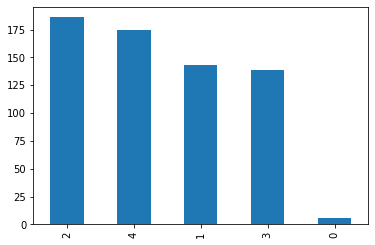

In [32]:
df_por.Medu.value_counts().plot.bar()

- Les mamans d'élèves ont reçu au moins une formation scolaire.

##### Fedu

<AxesSubplot:>

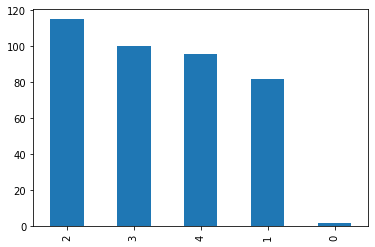

In [33]:
df_maths.Fedu.value_counts().plot.bar()

<AxesSubplot:>

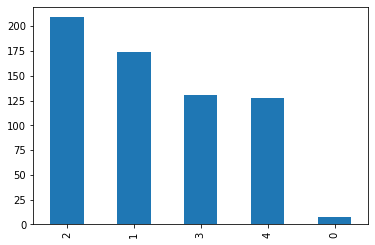

In [34]:
df_por.Fedu.value_counts().plot.bar()

- Il y a plus d'élèves dont le papa a reçu une éducation.

##### Mjob et Fjob

<AxesSubplot:>

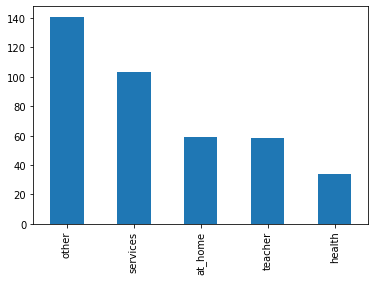

In [35]:
df_maths.Mjob.value_counts().plot.bar()

<AxesSubplot:>

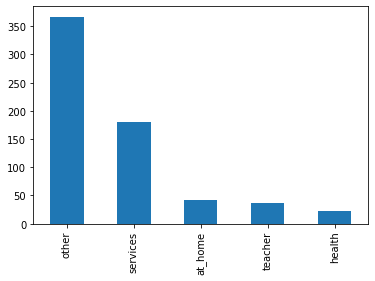

In [36]:
df_por.Fjob.value_counts().plot.bar()

<AxesSubplot:>

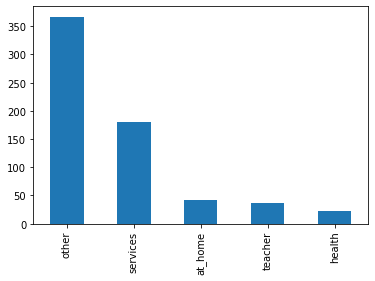

In [37]:
df_por.Fjob.value_counts().plot.bar()

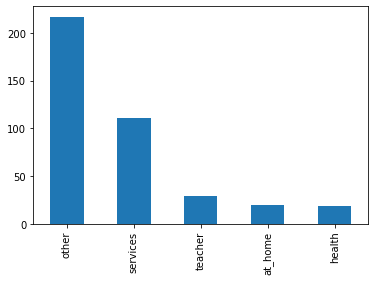

In [40]:
df_maths.Fjob.value_counts().plot.bar()

- Il y a plus d'élèves dont l'activité professionnelle des parents est inconnue.

#### reason

<AxesSubplot:>

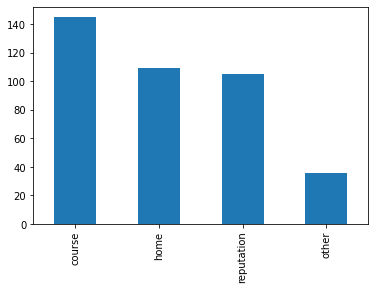

In [40]:
df_maths.reason.value_counts().plot.bar()

<AxesSubplot:>

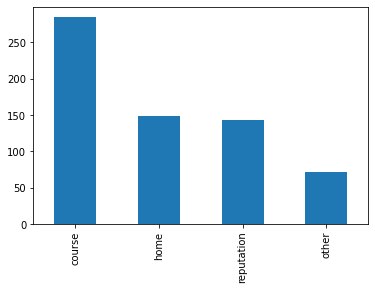

In [41]:
df_por.reason.value_counts().plot.bar()

- Beaucoup ont choisi cette école pour la préférence des cours.

##### guardian

<AxesSubplot:>

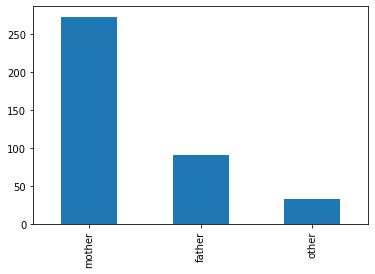

In [42]:
df_maths.guardian.value_counts().plot.bar()

<AxesSubplot:>

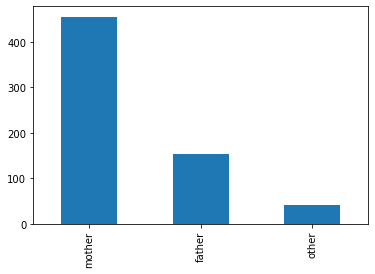

In [43]:
df_por.guardian.value_counts().plot.bar()

- Il y a plus d'élèves gardés par la maman.

##### traveltime

<AxesSubplot:>

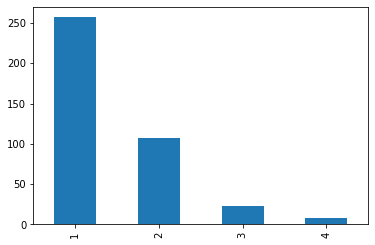

In [44]:
df_maths.traveltime.value_counts().plot.bar()

<AxesSubplot:>

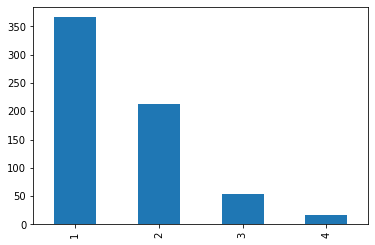

In [45]:
df_por.traveltime.value_counts().plot.bar()

- Il y a plus d'élèves qui ont font moins de 15 minutes comme trajet.

##### studytime

<AxesSubplot:>

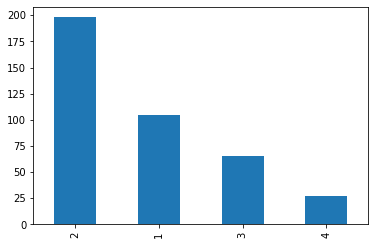

In [46]:
df_maths.studytime.value_counts().plot.bar()

<AxesSubplot:>

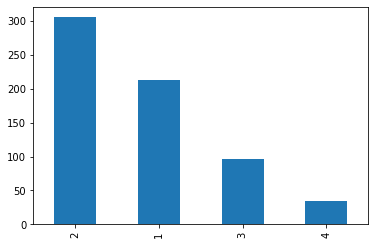

In [47]:
df_por.studytime.value_counts().plot.bar()

- Le temps de revision de bon nombre d'élèves est entre 2 et 5  heures.

##### failures

<AxesSubplot:>

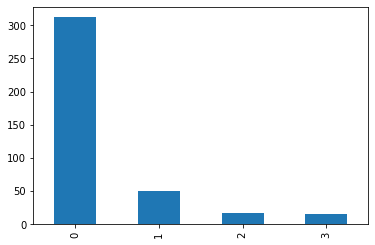

In [48]:
df_maths.failures.value_counts().plot.bar()

<AxesSubplot:>

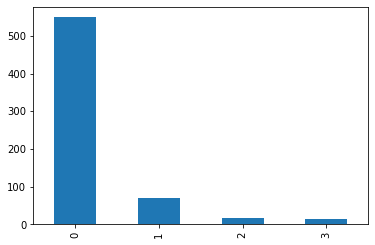

In [49]:
df_por.failures.value_counts().plot.bar()

- Beaucoup d'élèves n'ont pas échoué dans les classes antérieures.

##### schoolsup

<AxesSubplot:>

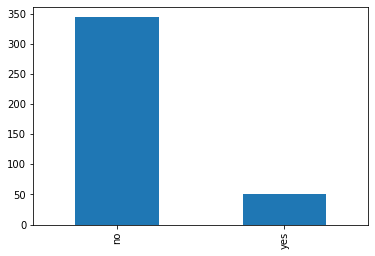

In [50]:
df_maths.schoolsup.value_counts().plot.bar()

<AxesSubplot:>

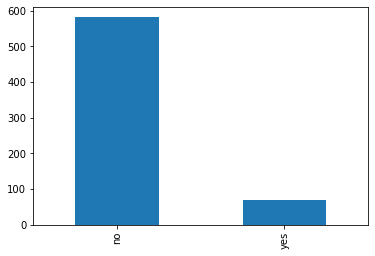

In [51]:
df_por.schoolsup.value_counts().plot.bar()

- Beaucoup d'élèves ne béneficient pas d'un support éducationnel extra-scolaire.

##### famsup

<AxesSubplot:>

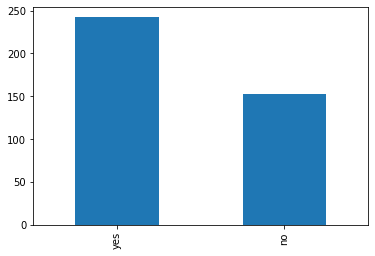

In [52]:
df_maths.famsup.value_counts().plot.bar()

<AxesSubplot:>

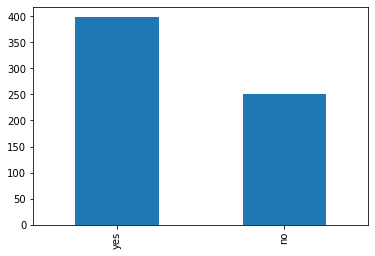

In [53]:
df_por.famsup.value_counts().plot.bar()

- La plupart d'élèves reçoivent un support éducationnel familial.

##### paid

<AxesSubplot:>

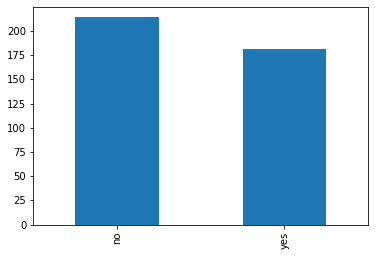

In [54]:
df_maths.paid.value_counts().plot.bar()

<AxesSubplot:>

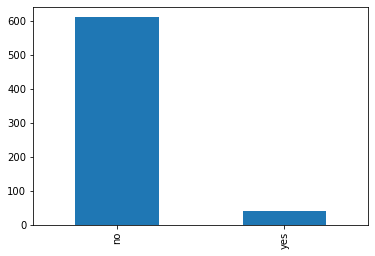

In [55]:
df_por.paid.value_counts().plot.bar()

- Les élèves ne reçoivent de cours supplémentaires payés par les parents.

##### activities

<AxesSubplot:>

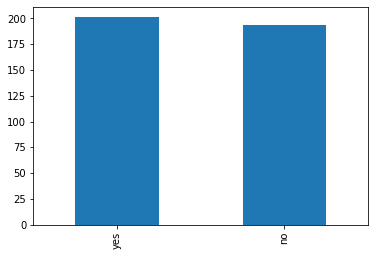

In [56]:
df_maths.activities.value_counts().plot.bar()

<AxesSubplot:>

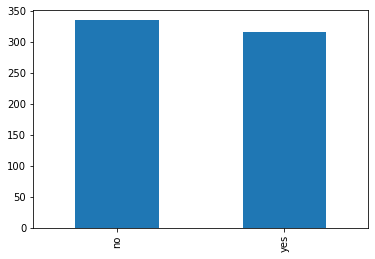

In [57]:
df_por.activities.value_counts().plot.bar()

##### nursery

<AxesSubplot:>

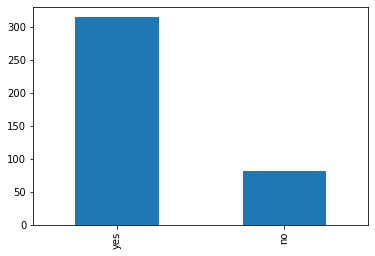

In [58]:
df_maths.nursery.value_counts().plot.bar()

##### higher

<AxesSubplot:>

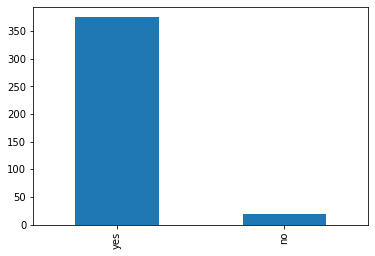

In [59]:
df_maths.higher.value_counts().plot.bar()

##### internet

<AxesSubplot:>

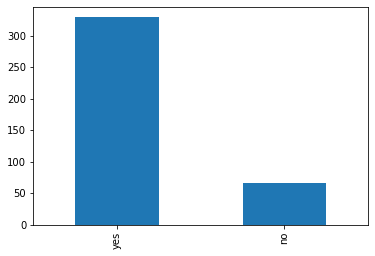

In [60]:
df_maths.internet.value_counts().plot.bar()

##### romantic

<AxesSubplot:>

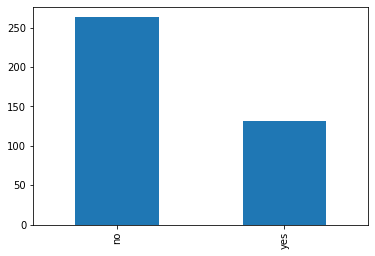

In [61]:
df_maths.romantic.value_counts().plot.bar()

##### famrel

<AxesSubplot:>

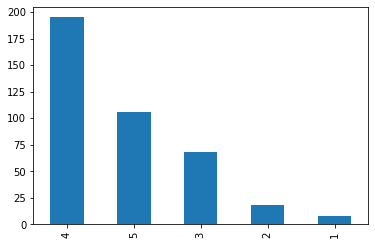

In [62]:
df_maths.famrel.value_counts().plot.bar()

##### freetime

<AxesSubplot:>

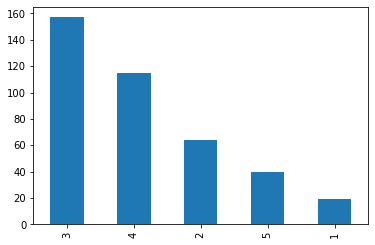

In [63]:
df_maths.freetime.value_counts().plot.bar()

##### goout

<AxesSubplot:>

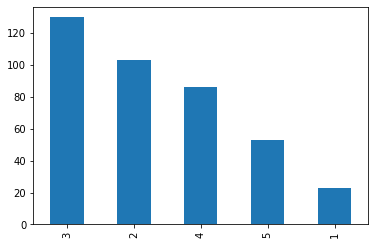

In [64]:
df_maths.goout.value_counts().plot.bar()

##### Dalc

<AxesSubplot:>

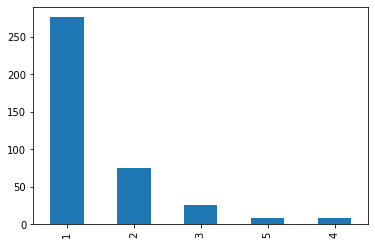

In [65]:
df_maths.Dalc.value_counts().plot.bar()

##### Walc

<AxesSubplot:>

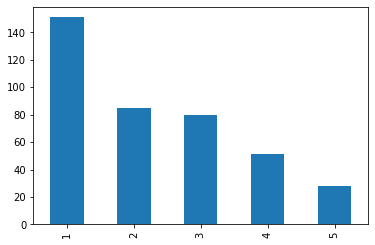

In [66]:
df_maths.Walc.value_counts().plot.bar()

##### health

<AxesSubplot:>

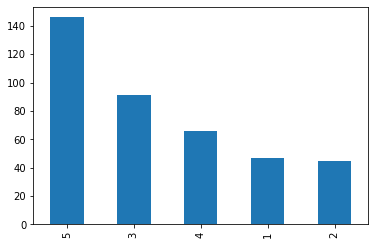

In [67]:
df_maths.health.value_counts().plot.bar()

##### absences

<AxesSubplot:>

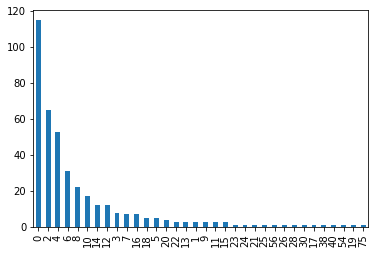

In [68]:
df_maths.absences.value_counts().plot.bar()

##### G1

<AxesSubplot:>

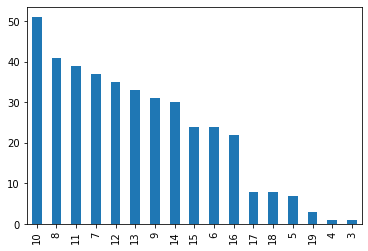

In [69]:
df_maths.G1.value_counts().plot.bar()

##### G2

<AxesSubplot:>

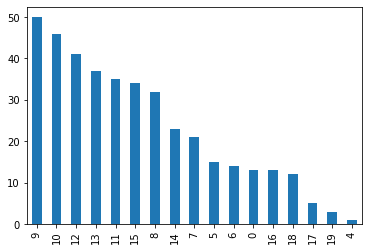

In [70]:
df_maths.G2.value_counts().plot.bar()

##### G3

<AxesSubplot:>

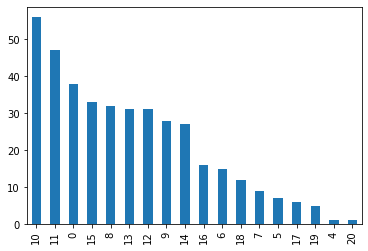

In [71]:
df_maths.G3.value_counts().plot.bar()

<AxesSubplot:>

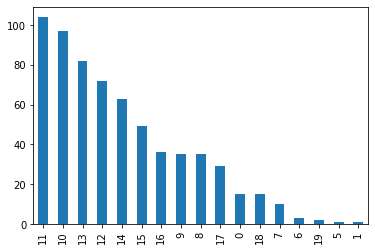

In [289]:
df_por.G3.value_counts().plot.bar()

##### finalresult

<AxesSubplot:>

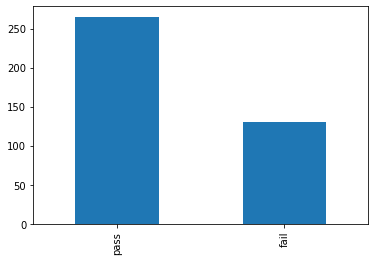

In [72]:
df_maths.finalResult.value_counts().plot.bar()

##### academicgrade

<AxesSubplot:>

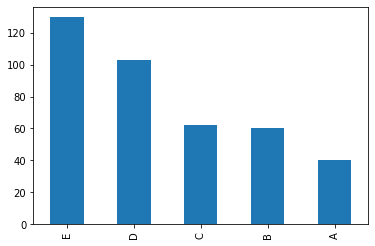

In [73]:
df_maths.academicGrade.value_counts().plot.bar()

##### Relation entre la variable G3 et quelques variables explicatives

<AxesSubplot:xlabel='sex'>

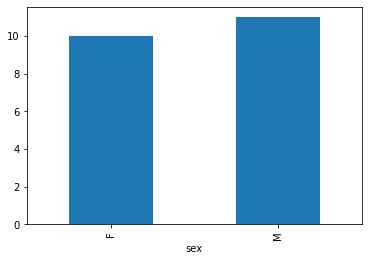

In [75]:
df_maths.groupby('sex')['G3'].median().plot.bar()

- Les garçons travaillent mieux que les filles.

<AxesSubplot:xlabel='age'>

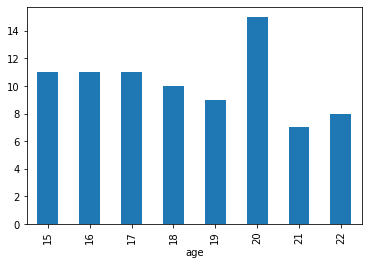

In [76]:
df_maths.groupby('age')['G3'].median().plot.bar()

- Les élèves ayant 20 ans ont la meilleure note en maths.

# Modélisation et prédiction 

#### Classification binaire sur la variable finalResult (Question 5)


###### Cas : Jeu de données des notes de maths

* Pré-traitement:

   - OnehotEncoder:  Encoder les variables categorielles. 
   - MinMaxScaler:  Standardisation des valeurs numériques 
   - SimpleImputer: methode ( de la classe Imputer) pour imputer les valeurs manquantes au cas où il y en a. Pour nos jeux de données, il n'y a pas de valeurs manquantes. 

In [77]:
# Divisons le jeu de données en données d'entrainement et de test.
X = df_maths.drop(['G3', 'finalResult','academicGrade'], axis= 1)
y = df_maths['finalResult']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, train_size = 0.8)

* Pipeline du pré-traitement de données:
    - Imputer les valeurs manquantes des variables numériques par la médiane et standardiser les valeurs.
    - Imputer les valeurs manquantes des variables categorielles par le mode et encoder grâce au one-hot encoding. 

In [78]:
num_transformers = Pipeline(steps= [('Imputer', SimpleImputer( strategy= 'median')), ('scale', MinMaxScaler())])
cat_transformers = Pipeline(steps= [('Imputer', SimpleImputer(strategy= 'most_frequent', fill_value= 'missing')), ('onehot', OneHotEncoder())])

In [80]:
# On cherche les variables selon leur type (numérique ou categoriel).
num_variables = X_train.select_dtypes(include= ['int32', 'int64', 'float64']).columns 
cat_variables = X_train.select_dtypes(include= ['object']).columns

In [81]:
# On transforme les variables grâce à ColumnTransformer
preprocessing = ColumnTransformer(transformers= [('numeric', num_transformers, num_variables), 
                                                 ('categorical', cat_transformers, cat_variables)], remainder= 'passthrough')

- Random Forest

In [82]:
# On définit le model et le pipeline
rf = RandomForestClassifier()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', rf)])

In [83]:
# On définit quelques hyperparamètres à optimiser
parameters = parameters = {
  'model__n_estimators':[100,200,300,400],
  'model__min_samples_split': [2,3,4,5]
  }

In [84]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'accuracy')

In [85]:
# On entraine le modèle.
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [86]:
# Les meilleurs hyperparamètres
grid_pipeline.best_params_

{'model__min_samples_split': 3, 'model__n_estimators': 200}

In [89]:
accuracy_rf_test = grid_pipeline.best_score_
print('L\'accuracy est {}'.format(accuracy_rf_test))

L'accuracy est 0.9176699610661876


In [90]:
# convertir y_test en données numériques
y_test_num = []
for col in y_test.values:
    if col == 'pass':
        y_test_num.append(1)
    else:
        y_test_num.append(0)

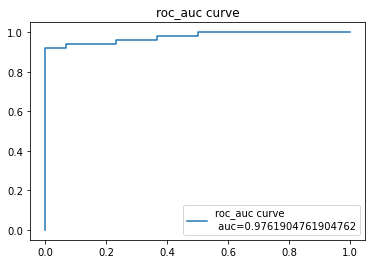

In [91]:
# Courbe roc_auc pour évaluer le modèle sur les données d'évaluation
y_pred_proba = grid_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_num,  y_pred_proba)
auc_val_rf = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc_val_rf))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

auc_score pour random forest: 0.97.

- Knn

In [92]:
# On définit le model et le pipeline
knn = KNeighborsClassifier()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', knn)])

In [93]:
# On définit les hyperparamètres que l'on souhaite optimiser.
parameters = parameters = {
  'model__n_neighbors':[3,4,5,6],
  'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  }

In [94]:
# On définit GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'accuracy')

In [95]:
# Le modèle est entrainé
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [96]:
# Les meilleurs hyperparamètres
grid_pipeline.best_params_

{'model__algorithm': 'auto', 'model__n_neighbors': 5}

In [98]:
accuracy_knn_test = grid_pipeline.best_score_
print('L\'accuracy est {}.'.format(accuracy_knn_test))

L'accuracy est 0.6488769092542678.


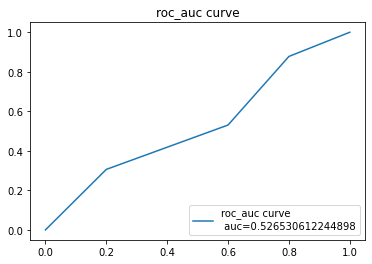

In [99]:
## La courbe roc_auc pour l'évaluation du modèle
y_pred_proba = grid_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_num,  y_pred_proba)
auc_val_knn = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc_val_knn))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

roc_auc pour knn: 0.52

- Regression logistique

In [100]:
# On définit la regression logistique
lr = LogisticRegression()

In [101]:
# Les hyperparametres à optimiser.
parameters = {'model__max_iter': [100,200,300,400,500], "model__C": [0.001,0.01, 0.1]}

In [102]:
# Le pipeline 
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', lr)])

In [103]:
# On définit GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'accuracy')

In [104]:
# On entraine le modèle
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                         ('

In [105]:
## Meilleurs paramètres
grid_pipeline.best_params_

{'model__C': 0.1, 'model__max_iter': 100}

In [106]:
# Meilleur score
accuracy_lr_test = grid_pipeline.best_score_
print('L \'accuracy obtenu est {}'.format(accuracy_lr_test))

L 'accuracy obtenu est 0.7373764600179694


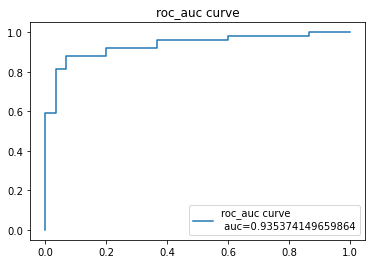

In [107]:
# roc_auc courbe pour évaluer le modèle.
y_pred_proba = grid_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_num,  y_pred_proba)
auc_val_lr = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc_val_lr))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

roc_auc score pour la regression logistique: 0.93

- SVM

In [108]:
# Model
svc = SVC(probability= True)

In [109]:
# Hyperparametres à optimiser
parameters = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'model__C': [0.001,0.01,0.1], 'model__max_iter':[200,400,500,700]}

In [110]:
# pipeline: pre-traitement et model
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', svc)])

In [111]:
## GridSearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv = 3, scoring= 'accuracy')

In [112]:
## On entraine le modèle
grid_pipeline.fit(X_train, y_train)

C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [113]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__C': 0.1, 'model__kernel': 'linear', 'model__max_iter': 200}

In [114]:
# Meilleur score
accuracy_svm_test = grid_pipeline.best_score_
print('Le score obtenu est {}'.format(accuracy_svm_test))

Le score obtenu est 0.772177298592393


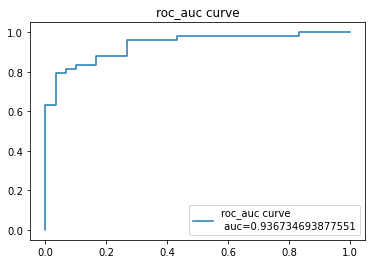

In [115]:
# roc_auc courbe
y_pred_proba = grid_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_num,  y_pred_proba)
auc_val_svm = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc_val_svm))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

 roc_auc score pour svm: 0.93

- Gradient Boosting

In [116]:
# model
gb = GradientBoostingClassifier()

In [117]:
# Hyperparamètres à optimiser
parameters = {'model__n_estimators': [100,200,300,400], 
             'model__max_depth': [3,5,6,7],
             'model__learning_rate': [0.001,0.01,0.1]}

In [118]:
# pipeline de prétraitement
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', gb)])

In [119]:
# Gridsearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv = 3, scoring= 'accuracy')

In [120]:
## entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [121]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 200}

In [124]:
# Meilleur score
accuracy_gb_test = grid_pipeline.best_score_
print('L\'accuracy obtenu est {}'.format(accuracy_gb_test))

L'accuracy obtenu est 0.9272536687631027


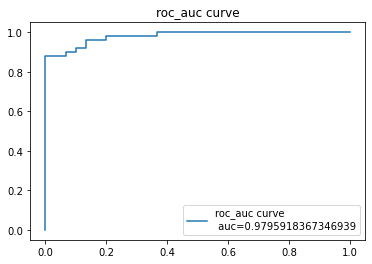

In [125]:
# roc_auc courbe pour l'évaluation du modèle
y_pred_proba = grid_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_num,  y_pred_proba)
auc_val_gb = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc_val_gb))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

roc_auc scorepour gradient boosting: 0.98

- Adaptative Boosting (ada)

In [126]:
# modèle
ada = AdaBoostClassifier()

In [127]:
# Hyperparamètres à optimiser
parameters = {'model__n_estimators': [100,200,400,500],
    'model__learning_rate':[0.001,0.01, 0.1]}

In [128]:
# pipeline prétraitement et model
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', ada)])

In [129]:
# Gridsearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv= 3, scoring= 'accuracy')

In [130]:
# On entraine le modèle
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [131]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__learning_rate': 0.1, 'model__n_estimators': 200}

In [132]:
# Meilleur score
accuracy_ada_test = grid_pipeline.best_score_
print('L\'accuracy obtenu est {}'.format(accuracy_ada_test))

L'accuracy obtenu est 0.9177897574123989


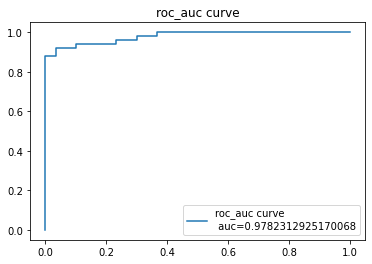

In [133]:
# roc_auc courbe
y_pred_proba = grid_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_num,  y_pred_proba)
auc_val_ada = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="roc_auc curve \n auc="+str(auc_val_ada))
plt.legend(loc=4)
plt.title('roc_auc curve')
plt.show()

roc_auc score pour adaboost: 0.97

- Comparaison des modèles

In [134]:
resultat_accuracy = {'random_forest':auc_val_rf, 'knn': auc_val_knn, 
                     'regression_logistique': auc_val_lr, 'svm': auc_val_svm,
                    'gradient_boosting': auc_val_gb,
                    'ada_boosting':auc_val_ada}

In [140]:
resultat = pd.DataFrame(resultat_accuracy.values(), columns= ['auc_score'])
resultat['model'] = list(resultat_accuracy.keys())
resultat

,auc_score,model
0,0.976190,random_forest
1,0.526531,knn
2,0.935374,regression_logistique
3,0.936735,svm
4,0.979592,gradient_boosting
5,0.978231,ada_boosting


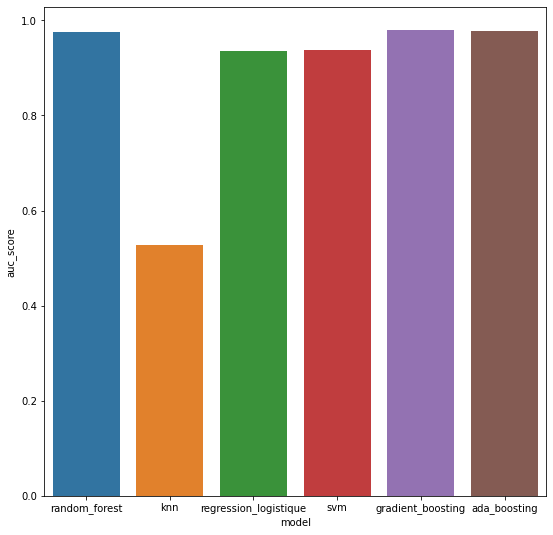

In [142]:
plt.figure(figsize= (9,9))
sn.barplot(x = resultat['model'], y = resultat['auc_score'])
plt.show()

Commentaire: Seul l'algorithme Knn donne un faible résultat.

# Classification binaire sur la variable academicGrade (Question 6)


In [143]:
# Divisons le jeu de données en données d'entrainement et de test.
y = df_maths['academicGrade']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, train_size = 0.8)

- Randomforest

In [145]:
# On définit le model et le pipeline
rf = RandomForestClassifier()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', rf)])

In [146]:
# On définit quelques hyperparamètres à optimiser
parameters = parameters = {
  'model__n_estimators':[100,200,300,400],
  'model__min_samples_split': [2,3,4,5]
  }

In [147]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'accuracy')

In [148]:
# Le modèle est entrainé
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [150]:
accuracy_rf_test = grid_pipeline.best_score_
print('L\'accuracy est {}.'.format(accuracy_rf_test))

L'accuracy est 0.7120694818808025.


In [151]:
# Les meilleurs hyperparamètres
grid_pipeline.best_params_

{'model__min_samples_split': 3, 'model__n_estimators': 300}

In [152]:
# Fonction pour évaluer l'auc score pour un problème de classification multi-classe.

def multi_class_roc_auc(y_test, y_pred,average = "macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred, average= average)

In [153]:
# prédiction avec les données d'évaluation et calcul de l'auc score
y_pred = grid_pipeline.predict(X_test)
auc_val_rf = multi_class_roc_auc(y_test=y_test, y_pred= y_pred, average= "macro")

In [154]:
auc_val_rf

0.7507305839002268

- Knn

In [155]:
# On définit le model et le pipeline
knn = KNeighborsClassifier()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', knn)])

In [156]:
# On définit les hyperparamètres que l'on souhaite optimiser.
parameters = parameters = {
  'model__n_neighbors':[3,4,5,6],
  'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  }

In [157]:
# On définit GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'accuracy')

In [158]:
# Le modèle est entrainé
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [159]:
# Les meilleurs hyperparamètres
grid_pipeline.best_params_

{'model__algorithm': 'auto', 'model__n_neighbors': 6}

In [161]:
accuracy_knn_test = grid_pipeline.best_score_
print('L\'accuracy est {}.'.format(accuracy_knn_test))

L'accuracy est 0.3579814315663372.


In [162]:
# prédiction avec les données d'évaluation et calcul de l'auc score
y_pred = grid_pipeline.predict(X_test)
auc_val_knn = multi_class_roc_auc(y_test=y_test, y_pred= y_pred, average= "macro")

In [163]:
auc_val_knn

0.4938477891156463

- SVM

In [164]:
# Model
svc = SVC()

In [165]:
# Hyperparametres à optimiser
parameters = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'model__C': [0.001,0.01,0.1], 'model__max_iter':[200,400,500,700]}

In [166]:
# pipeline: pre-traitement et model
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', svc)])

In [167]:
## GridSearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv = 3, scoring= 'accuracy')

In [168]:
## On entraine le modèle
grid_pipeline.fit(X_train, y_train)

C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [169]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__C': 0.1, 'model__kernel': 'linear', 'model__max_iter': 200}

In [170]:
# Meilleur score
accuracy_svm_test = grid_pipeline.best_score_
print('L\'accuracy obtenu est {}'.format(accuracy_svm_test))

L'accuracy obtenu est 0.40215633423180597


In [171]:
# prédiction avec les données d'évaluation et calcul de l'auc score
y_pred = grid_pipeline.predict(X_test)
auc_val_svm = multi_class_roc_auc(y_test=y_test, y_pred= y_pred, average= "macro")

In [172]:
auc_val_svm

0.559624433106576

- Gradient Boosting

In [173]:
# model
gb = GradientBoostingClassifier()

In [174]:
# Hyperparamètres à optimiser
parameters = {'model__n_estimators': [100,200,300,400], 
             'model__max_depth': [3,5,6,7],
             'model__learning_rate': [0.001,0.01,0.1]}

In [175]:
# pipeline de prétraitement
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', gb)])

In [176]:
# Gridsearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv = 3, scoring= 'accuracy')

In [177]:
## entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [178]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__n_estimators': 300}

In [184]:
# Meilleur score
accuracy_gb_test = grid_pipeline.best_score_
print('L\'accuracy obtenu est {}'.format(accuracy_gb_test))

L'accuracy obtenu est 0.7437256663671757


In [182]:
# prédiction avec les données d'évaluation et calcul de l'auc score
y_pred = grid_pipeline.predict(X_test)
auc_val_gb = multi_class_roc_auc(y_test=y_test, y_pred= y_pred, average= "macro")

In [183]:
auc_val_gb

0.8452543934240362

- Regression logistique

In [185]:
# On définit la regression logistique
lr = LogisticRegression()

In [186]:
# Les hyperparametres à optimiser.
parameters = {'model__max_iter': [100,200,300,400,500], "model__C": [0.001,0.01, 0.1]}

In [187]:
# Le pipeline 
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', lr)])

In [188]:
# Gridsearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv = 3, scoring= 'accuracy')

In [189]:
## entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                         ('

In [190]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__C': 0.1, 'model__max_iter': 100}

In [192]:
# Meilleur score
accuracy_gb_test = grid_pipeline.best_score_
print('L\'accuracy obtenu est {}'.format(accuracy_gb_test))

L'accuracy obtenu est 0.40518119197364477


In [193]:
# prédiction avec les données d'évaluation et calcul de l'auc score
y_pred = grid_pipeline.predict(X_test)
auc_val_lr = multi_class_roc_auc(y_test=y_test, y_pred= y_pred, average= "macro")

In [194]:
auc_val_lr

0.5813945578231292

- Adaptative boosting

In [195]:
# modèle
ada = AdaBoostClassifier()

In [196]:
# Hyperparamètres à optimiser
parameters = {'model__n_estimators': [100,200,400,500],
    'model__learning_rate':[0.001,0.01, 0.1]}

In [197]:
# Le pipeline 
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', ada)])

In [198]:
# Gridsearch
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv = 3, scoring= 'accuracy')

In [199]:
## entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [200]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__learning_rate': 0.001, 'model__n_estimators': 200}

In [202]:
# Meilleur score
accuracy_ada_test = grid_pipeline.best_score_
print('L\'accuracy obtenu est {}'.format(accuracy_gb_test))

L'accuracy obtenu est 0.40518119197364477


In [203]:
# prédiction avec les données d'évaluation et calcul de l'auc score
y_pred = grid_pipeline.predict(X_test)
auc_val_ada = multi_class_roc_auc(y_test=y_test, y_pred= y_pred, average= "macro")

In [204]:
auc_val_ada

0.7860926870748299

- comparaison des modèles

In [205]:
resultat_accuracy = {'random_forest':auc_val_rf, 'knn': auc_val_knn, 
                     'regression_logistique': auc_val_lr,'svm': auc_val_svm,
                    'gradient_boosting': auc_val_gb,
                    'ada_boosting':auc_val_ada}

In [206]:
resultat = pd.DataFrame(resultat_accuracy.values(), columns= ['roc_auc_score'])
resultat['model'] = list(resultat_accuracy.keys())
resultat

,roc_auc_score,model
0,0.750731,random_forest
1,0.493848,knn
2,0.581395,regression_logistique
3,0.559624,svm
4,0.845254,gradient_boosting
5,0.786093,ada_boosting


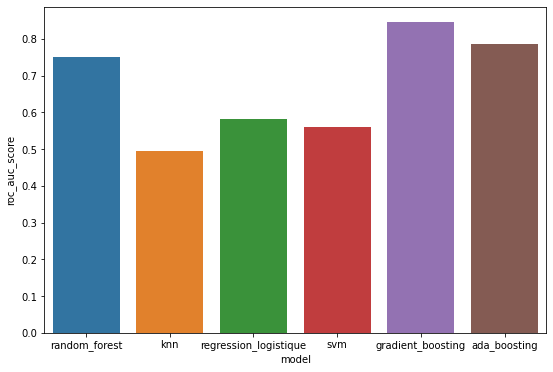

In [210]:
plt.figure(figsize= (9,6))
sn.barplot(x = resultat['model'], y = resultat['roc_auc_score'])
plt.show()

# Régression sur la variable G3 (Question 7)


In [216]:
# Divisons le jeu de données en données d'entrainement et de test.
y = df_maths['G3']
X = df_maths.drop(['G3', 'finalResult','academicGrade'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, train_size = 0.8)

- Random forest regressor

In [230]:
# On définit le model et le pipeline
rf = RandomForestRegressor()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', rf)])

In [231]:
# On définit quelques hyperparamètres à optimiser
parameters = parameters = {
  'model__n_estimators':[100,200,300,400],
  'model__min_samples_split': [2,3,4,5]
  }

In [232]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'neg_mean_squared_error')

In [233]:
## entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [234]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__min_samples_split': 3, 'model__n_estimators': 400}

In [235]:
# Meilleur score
accuracy_rf_test = grid_pipeline.best_score_
print('Le score (MEAN SQUARED ERROR) obtenu est {}'.format(np.abs(accuracy_rf_test)))

Le score (MEAN SQUARED ERROR) obtenu est 2.2413495749423835


In [245]:
## Evaluation
y_pred = grid_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_true= y_test, y_pred= y_pred)

In [246]:
mse_rf

3.3738297429543085

- KNN

In [247]:
# On définit le model et le pipeline
knn = KNeighborsRegressor()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', knn)])

In [248]:
# On définit les hyperparamètres que l'on souhaite optimiser.
parameters = parameters = {
  'model__n_neighbors':[3,4,5,6],
  'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  }

In [249]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'neg_mean_squared_error')

In [250]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [251]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__algorithm': 'auto', 'model__n_neighbors': 5}

In [252]:
# Meilleur score
accuracy_knn_test = grid_pipeline.best_score_
print('Le score (MEAN SQUARED ERROR) obtenu est {}'.format(np.abs(accuracy_knn_test)))

Le score (MEAN SQUARED ERROR) obtenu est 17.645678346810424


In [253]:
## Evaluation
y_pred = grid_pipeline.predict(X_test)
mse_knn = mean_squared_error(y_true= y_test, y_pred= y_pred)

In [254]:
mse_knn

26.228354430379742

- Gradient boosting

In [255]:
# On définit la regression logistique
gb = GradientBoostingRegressor()
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', gb)])

In [256]:
# Hyperparamètres à optimiser
parameters = {'model__n_estimators': [100,200,300,400], 
             'model__max_depth': [3,5,6,7],
             'model__learning_rate': [0.001,0.01,0.1]}

In [257]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'neg_mean_squared_error')

In [258]:
# Entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [259]:
# Meilleurs hyperparametres
grid_pipeline.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__n_estimators': 400}

In [260]:
# Meilleur score
accuracy_gb_test = grid_pipeline.best_score_
print('Le score (MEAN SQUARED ERROR) obtenu est {}'.format(np.abs(accuracy_gb_test)))

Le score (MEAN SQUARED ERROR) obtenu est 2.242793025044137


In [261]:
## Evaluation
y_pred = grid_pipeline.predict(X_test)
mse_gb = mean_squared_error(y_true= y_test, y_pred= y_pred)

In [262]:
mse_gb

3.7016678735368918

- Ada Boosting regressor

In [263]:
# modèle
ada = AdaBoostRegressor()

In [264]:
# pipeline 
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', ada)])

In [265]:
# Hyperparamètres à optimiser
parameters = {'model__n_estimators': [100,200,400,500],
    'model__learning_rate':[0.001,0.01, 0.1]}

In [266]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'neg_mean_squared_error')

In [267]:
# entrainement
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                                          O

In [268]:
# Best hyperparamètres
grid_pipeline.best_params_

{'model__learning_rate': 0.001, 'model__n_estimators': 400}

In [269]:
# Meilleur score
accuracy_ada_test = grid_pipeline.best_score_
print('Le score (MEAN SQUARED ERROR) obtenu est {}'.format(np.abs(accuracy_ada_test)))

Le score (MEAN SQUARED ERROR) obtenu est 2.5518607050678597


In [270]:
## Evaluation
y_pred = grid_pipeline.predict(X_test)
mse_ada = mean_squared_error(y_true= y_test, y_pred= y_pred)

In [271]:
mse_ada

4.033795858660608

- SVR

In [272]:
# Model
svr = SVR()
# pipeline 
pipeline = Pipeline(steps= [('preprocessing', preprocessing), ('model', svr)])

In [273]:
# Hyperparametres à optimiser
parameters = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'model__C': [0.001,0.01,0.1], 'model__max_iter':[200,400,500,700]}

In [274]:
# On utilise GridSearchCV
grid_pipeline = GridSearchCV(pipeline, param_grid= parameters, cv=3, scoring= 'neg_mean_squared_error')

In [275]:
# entrainement
grid_pipeline.fit(X_train, y_train)

C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Serge\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'...
                                                                         Index(['school', '

In [276]:
# Meilleur score
accuracy_svm_test = grid_pipeline.best_score_
print('Le score (MEAN SQUARED ERROR) obtenu est {}'.format(np.abs(accuracy_svm_test)))

Le score (MEAN SQUARED ERROR) obtenu est 11.984662865939725


In [277]:
# Best hyperparameters
grid_pipeline.best_params_

{'model__C': 0.1, 'model__kernel': 'linear', 'model__max_iter': 200}

In [281]:
## Evaluation
y_pred = grid_pipeline.predict(X_test)
mse_svm = mean_squared_error(y_true= y_test, y_pred= y_pred)

In [282]:
mse_svm

14.421480075730573

-  comparaison des modèles

In [283]:
resultat_mse= {'ada_boost':mse_ada, 'knn':mse_knn, 'svm': mse_svm,
                    'gradient_boosting': mse_gb} 

In [285]:
resultat = pd.DataFrame(resultat_mse.values(), columns= ['mean_squared_error'])
resultat['model'] = list(resultat_mse.keys())
resultat

,mean_squared_error,model
0,4.033796,ada_boost
1,26.228354,knn
2,14.421480,svm
3,3.701668,gradient_boosting


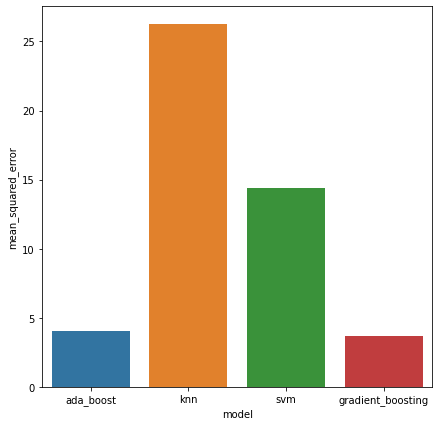

In [287]:
plt.figure(figsize= (7,7))
sn.barplot(x = resultat['model'], y = resultat['mean_squared_error'])
plt.show()

# Conclusion (Question 8)

- Les jeux de données ne contiennent pas de valeurs manquantes.
- L'analyse exploratoire a permis de visualiser la distribution des données.
- Nous avons travaillé sur le jeu de données concernant les notes de mathématiques.
- Nous avons utilisé six algorithmes pour le problème de classification binaire portant sur la variable finalResult: randomforest, k nearest neighbors (knn), adaptative boosting, gradient boosting, support vector machine(svm) et la regression logistique. knn et support vector machine (svm) donnent de mauvais résultat.
- Pour le problème de classification de multi-classe, gradient boosting donne le meilleur résultat.
- Concernant le problème de régression, nous avons utilisé quatre algorithmes: adaptative boosting, k nearest neighbors (knn), support vector machine (svm) et gradient boosting.knn et gradient boosting donnent les plus petites valeurs de la métrique utilisée, à savoir Mean Squared Error (MSE).
